<a href="https://colab.research.google.com/github/ArthurRoque/Imers-oDados-Alura2022/blob/main/Aula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
imoveis = pd.read_csv(url)

In [24]:
imoveis.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [25]:
imoveis.sample()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
554,"Rua Imbocuí, 342",Vila Moreira,São Paulo,167,2,2,3,R$ 1.000.000


In [26]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [27]:
imoveis['Rua'].value_counts()

Rua Alberto Faria                               24
Avenida das Magnólias                           21
Rua Sampaio Vidal                               19
Rua Mesquita                                    18
Rua Comandante Ismael Guilherme                 18
                                                ..
Avenida Jaçanã                                   1
Travessa Bruno Andreoni                          1
Rua Andronico                                    1
Rua Professor Brasil Machado de Campos           1
Rua Antônio de Castro Mendonça Furtado, 373      1
Name: Rua, Length: 3130, dtype: int64

In [28]:
imoveis.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


## Desafio 1: Realizar a média da metragem para cada um dos bairros.

In [29]:
imoveis.groupby('Bairro').mean() # Agrupando os imóveis pelo bairro e calculando a média de todas as variáveis numéricas de cada um.

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,253.056818,3.318182,3.079545,2.909091
Alto da Boa Vista,418.875000,4.125000,5.125000,4.625000
Alto da Lapa,294.337209,3.151163,3.790698,3.906977
Alto da Mooca,270.050000,3.300000,2.600000,3.650000
Alto de Pinheiros,433.444988,3.938875,4.838631,5.004890
...,...,...,...,...
Vila Água Funda,152.200000,2.600000,2.200000,2.600000
Água Branca,191.000000,3.153846,3.076923,2.461538
Água Fria,165.416667,2.833333,3.416667,2.500000


In [30]:
media_de_metragem_por_bairro = imoveis.groupby('Bairro')['Metragem'].mean() # Selecionando apenas a coluna 'Metragem' e armazenando-a em uma variável.
media_de_metragem_por_bairro

Bairro
Aclimação            253.056818
Alto da Boa Vista    418.875000
Alto da Lapa         294.337209
Alto da Mooca        270.050000
Alto de Pinheiros    433.444988
                        ...    
Vila Água Funda      152.200000
Água Branca          191.000000
Água Fria            165.416667
Água Funda           139.000000
Água Rasa            340.250000
Name: Metragem, Length: 701, dtype: float64

In [31]:
media_de_metragem_por_bairro['Vila Mariana'] # Dessa forma, pode-se obter a média de metragem de qualquer bairro passando-o pelos colchetes.

233.6195652173913

## Desafio 2: Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas).

### Mascara com parâmetro (ensinado na aula)
Cria-se um parâmetro que será passado entre colchetes para o dataframe.

In [32]:
vila_mariana =( imoveis["Bairro"] == "Vila Mariana") # Criando parâmetro
imoveis[vila_mariana]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


### 1. Método query

In [33]:
# Forma 1: Através do método query
imoveis.query('Bairro == "Vila Mariana"')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


### 2. Máscara com o método isin()
Seleciona os valores a partir de uma lista dada.

In [34]:
bairros_desejados = ['Vila Mariana', 'Planalto Paulista']
imoveis[imoveis['Bairro'].isin(bairros_desejados)]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
75,Rua Francisco de Paula Brito,Planalto Paulista,São Paulo,250,3,4,4,R$ 2.190.000
79,Rua Elisa Rodrigues,Planalto Paulista,São Paulo,184,4,3,4,R$ 1.390.000
87,NaN,Planalto Paulista,São Paulo,119,2,2,2,R$ 670.000
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
...,...,...,...,...,...,...,...,...
9878,NaN,Planalto Paulista,São Paulo,200,3,3,3,R$ 680.000
9883,Alameda dos Tupinas,Planalto Paulista,São Paulo,405,4,6,4,R$ 1.550.000
9930,Avenida Odila,Planalto Paulista,São Paulo,262,3,6,4,R$ 1.500.000
9966,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000


## Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

Respondendo perguntas com gráficos.

### Quais bairros possuem os maiores imóveis de São Paulo?

In [64]:
maiores_imoveis = imoveis.query('Metragem > Metragem.quantile(q=0.9)')
cinco_maiores = maiores_imoveis['Bairro'].value_counts().head()
cinco_maiores


Jardim Guedala     121
Cidade Jardim       88
Jardim América      66
Jardim Europa       61
Jardim Paulista     51
Name: Bairro, dtype: int64

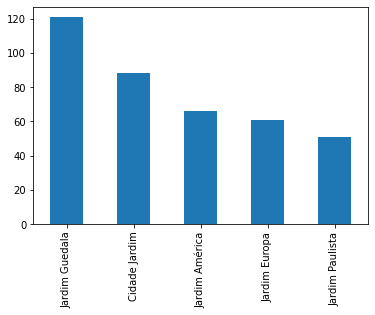

In [63]:
cinco_maiores.plot.bar()

### Dentre os 10 maiores bairros, todos possuem uma quantidade próxima de ruas?

### Procuro um imóvel com 3 quartos, 3 banheiros e 2 vagas. Em quais bairros devo procurar?